## Stocks Trading Strategy Based on Daily Price Change - Single Stocks
This strategy is to :
1. If the price of a certain stock falls more than a certain percentage within one day, buy one share of that stock in the next trading day.
2. Hold all the shares till today.
3. Evaluate the gain or loss.

## Disclaimer : 
This is not a good strategy and I'm not recommending anyone to follow it, this whole notebook is just a toy.

### 1. First thing first, import necessary libraries, some may not be used though...

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import yfinance
import quandl 
import datetime
from matplotlib import pyplot as plt

### 2. Get the stocks price data and work with it

In [14]:
df = pdr.DataReader('AAPL', 
                    'yahoo', 
                    start=datetime.datetime(2020,1,2), 
                    end=datetime.date.today()) # choose a stock and time frame

In [15]:
df['Ytd Close'] = df.Close.shift(1)
df['Diff'] = df.Close - df['Ytd Close']
df['Closing Price Pct Change'] = df.Close.pct_change() # daily price percentage change
# data = data.iloc[1:, :] # remove the first row
df

,High,Low,Open,Close,Volume,Adj Close,Ytd Close,Diff,Closing Price Pct Change
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,75.087502,-0.730003,-0.009722
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,74.357498,0.592499,0.007968
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,74.949997,-0.352493,-0.004703
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,74.597504,1.199997,0.016086
...,...,...,...,...,...,...,...,...,...
2021-08-19,148.000000,144.500000,145.029999,146.699997,86960300.0,146.699997,146.360001,0.339996,0.002323
2021-08-20,148.500000,146.779999,147.440002,148.190002,59947400.0,148.190002,146.699997,1.490005,0.010157
2021-08-23,150.190002,147.889999,148.309998,149.710007,60131800.0,149.710007,148.190002,1.520004,0.010257


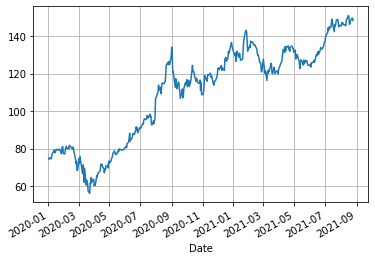

In [16]:
# plot the closing price
df['Close'].plot(grid=True)
plt.show()

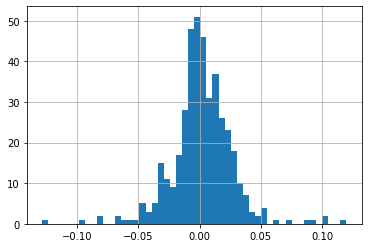

count    415.000000
mean       0.001957
std        0.025104
min       -0.128647
25%       -0.009183
50%        0.001255
75%        0.014627
max        0.119808
Name: Closing Price Pct Change, dtype: float64


In [17]:
# Plot the distribution of 'Close Price Pct Change'
df['Closing Price Pct Change'].hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(df['Closing Price Pct Change'].describe())

### 3. Let's create some helper functions before implementing the trading strategy

In [18]:
def pct_change(buy, sell):
    return (sell - buy) / buy

In [19]:
def mean(value, n):
    return value / n

### 4. The signal function

In [20]:
# produce a signal when to buy or sell the stocks
def signal(pct_change):
    if pct_change < -0.05: # choose a benchmark fall percentage
        return 'Buy'

### 5. Implement the strategy

In [21]:
mydate = []
mypctchange = []
myshares = []
mytotalshares = []
mybuyingprice = []
mytotalcost = []

for i, row in df.iterrows():
    if signal(row['Closing Price Pct Change']) == 'Buy':
        mydate.append(row.name)
        mypctchange.append(row['Closing Price Pct Change'])
        myshares.append(1)
        mytotalshares.append(sum(myshares))
        mybuyingprice.append(row['Open'])
        mytotalcost.append(sum(mybuyingprice))

# create my shares purchasing df
mydf = pd.DataFrame({'Date': mydate,
                     'Closing Price Pct Change': mypctchange,
                     'Daily Shares Bought': myshares,
                     'Total Shares': mytotalshares,
                     'Buying Price': mybuyingprice,
                     'Total Cost': mytotalcost})

#### 6. Results

In [22]:
# overall performance evaluation
myavgcost = mean(mytotalcost[-1], sum(myshares))
gainloss = pct_change(myavgcost, df['Close'][-1])
print('Total shares bought: ', sum(myshares))
print('Average cost: ', myavgcost)
print('Total cost:', mytotalcost[-1] * 8) # convert to your own currency, mop in this case, which is to simply multiply by 8
print('Gain/Loss pct: {}%'.format(round(gainloss*100, 2)))

Total shares bought:  9
Average cost:  81.7805553012424
Total cost: 5888.199981689453
Gain/Loss pct: 81.41%


In [23]:
mydf

,Date,Closing Price Pct Change,Daily Shares Bought,Total Shares,Buying Price,Total Cost
0,2020-02-27,-0.065368,1,1,70.275002,70.275002
1,2020-03-09,-0.079092,1,2,65.937500,136.212502
2,2020-03-12,-0.098755,1,3,63.985001,200.197502
3,2020-03-16,-0.128647,1,4,60.487499,260.685001
4,2020-03-20,-0.063486,1,5,61.794998,322.480000
5,2020-04-01,-0.052617,1,6,61.625000,384.105000
6,2020-09-03,-0.080061,1,7,126.910004,511.015003
7,2020-09-08,-0.067295,1,8,113.949997,624.965000
8,2020-10-30,-0.056018,1,9,111.059998,736.024998


In [24]:
df

,High,Low,Open,Close,Volume,Adj Close,Ytd Close,Diff,Closing Price Pct Change
Date,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,75.087502,-0.730003,-0.009722
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,74.357498,0.592499,0.007968
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,74.949997,-0.352493,-0.004703
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,74.597504,1.199997,0.016086
...,...,...,...,...,...,...,...,...,...
2021-08-19,148.000000,144.500000,145.029999,146.699997,86960300.0,146.699997,146.360001,0.339996,0.002323
2021-08-20,148.500000,146.779999,147.440002,148.190002,59947400.0,148.190002,146.699997,1.490005,0.010157
2021-08-23,150.190002,147.889999,148.309998,149.710007,60131800.0,149.710007,148.190002,1.520004,0.010257
